Backstory:

Takary and her team, showed me a query “WH_STOCKOUTS” (use my very slightly modified “SLT_WH_STOCKOUTS”) and it’s just seeing if QTY_AVAILABLE = 0 and universally counting that as a STOCKOUT.  I think overstates the true STOCKOUT cause it doesn’t account for the following (see technical detail far below):

 

    There is a field, “Do NOT replenish”  (I filled out the do not replenish flagged SKUS)
        Formally only kept the BU_ITEMS_INV.NO_REPLENISH_FLG = N (Double negative warning of “N”o Do not replenish) 

 

For example, I don’t believe below SKU is not a TRUE stockout – seems  more likely that warehouse team doesn’t want to replenish  (forgot to formally click the DO NOT replenish flag.)



In [61]:
import pandas as pd
import numpy as np
import os
import datetime

import matplotlib.pyplot as plt

In [5]:
os.chdir("/Users/pbenson/Documents/Min_Max_project/")

In [6]:
stockout_df = pd.read_csv('Data/WH_STOCKOUTS.csv')

In [7]:
stockout_df

,Item,Unit,Status Current,Group,Trans Date,UOM,Qty,Qty Avail,Replen Cls,Reorder Pt,Max Qty,Reord Qty,No Repl,Avg Matl Cost,Descr,Item Group,ItmFldC1A,User
0,2390030,CS004,Discontinue,41,01/05/2022,EA,0.0,0.0,G,0.0,0.0,0.0,Y,6.4476,LATCH KEEPER,90,NaN,CGARCIA
1,2390030,CS004,Discontinue,41,02/02/2022,EA,0.0,0.0,G,0.0,0.0,0.0,Y,6.4476,LATCH KEEPER,90,NaN,CGARCIA
2,2390030,CS004,Discontinue,60,02/23/2022,EA,24.0,0.0,G,0.0,0.0,0.0,Y,6.4476,LATCH KEEPER,90,NaN,AMORE
3,2390030,CS004,Discontinue,51,04/08/2022,EA,24.0,0.0,G,0.0,0.0,0.0,Y,6.4476,LATCH KEEPER,90,NaN,KHWANG
4,2390045,CS004,Discontinue,41,03/07/2022,EA,0.0,0.0,G,0.0,0.0,0.0,Y,1936.5000,"GLASS,WINDOW,C/S,EGRESS,HOPPER",90,NaN,CGARCIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3480,31471245,CS004,Active,41,01/19/2022,EA,0.0,0.0,G,15.0,30.0,15.0,N,17.5000,"CLASSIC C33 SAFETY CAP, HIGH-D",PHED,NaN,CGARCIA
3481,31471245,CS004,Active,30,05/04/2022,EA,1.0,0.0,G,15.0,30.0,15.0,N,17.5000,"CLASSIC C33 SAFETY CAP, HIGH-D",PHED,NaN,MBBATCH
3482,31471245,CS004,Active,41,05/06/2022,EA,0.0,0.0,G,15.0,30.0,15.0,N,17.5000,"CLASSIC C33 SAFETY CAP, HIGH-D",PHED,NaN,CGARCIA
3483,31471245,CS004,Active,30,05/09/2022,EA,33.0,0.0,G,15.0,30.0,15.0,N,17.5000,"CLASSIC C33 SAFETY CAP, HIGH-D",PHED,NaN,MBBATCH


In [20]:
small_stockout_df = stockout_df[['Item', 'Status Current', 'Trans Date', 'Qty', 'Qty Avail', 'Replen Cls', 'Reorder Pt', 'Reord Qty', 'Max Qty', 'No Repl']]

In [21]:
small_stockout_df

,Item,Status Current,Trans Date,Qty,Qty Avail,Replen Cls,Reorder Pt,Reord Qty,Max Qty,No Repl
0,2390030,Discontinue,01/05/2022,0.0,0.0,G,0.0,0.0,0.0,Y
1,2390030,Discontinue,02/02/2022,0.0,0.0,G,0.0,0.0,0.0,Y
2,2390030,Discontinue,02/23/2022,24.0,0.0,G,0.0,0.0,0.0,Y
3,2390030,Discontinue,04/08/2022,24.0,0.0,G,0.0,0.0,0.0,Y
4,2390045,Discontinue,03/07/2022,0.0,0.0,G,0.0,0.0,0.0,Y
...,...,...,...,...,...,...,...,...,...,...
3480,31471245,Active,01/19/2022,0.0,0.0,G,15.0,15.0,30.0,N
3481,31471245,Active,05/04/2022,1.0,0.0,G,15.0,15.0,30.0,N
3482,31471245,Active,05/06/2022,0.0,0.0,G,15.0,15.0,30.0,N
3483,31471245,Active,05/09/2022,33.0,0.0,G,15.0,15.0,30.0,N


In [25]:
all_part_usage = pd.read_csv('Data/unused_parts_not_recommended.csv', index_col=0) 

In [26]:
all_part_usage

,TXN - Item ID,mean_monthly_usage,padded_leadtime,final_min,6_month_roq,Base,Qty On Hand,On Hand Value,fmis_min,fmis_roq,Max Qty,TXN - Item Group
0,00170020,0.062500,1.316667,0.0,0.0,CS004,9.0,332.64,0.0,0.0,0.0,00
1,00170033,0.208333,1.433333,1.0,1.0,CS002,0.0,0.00,0.0,0.0,0.0,00
2,00170033,0.208333,1.433333,1.0,1.0,CS004,30.0,382.20,0.0,0.0,0.0,00
3,00170074,0.020833,2.433333,0.0,0.0,CS004,10.0,196.50,0.0,0.0,1.0,00
4,00245001,0.062500,1.000000,0.0,0.0,CS004,2350.0,8347.20,20.0,20.0,30.0,00
...,...,...,...,...,...,...,...,...,...,...,...,...
17116,02576416,0.000000,1.000000,0.0,0.0,CS004,75.0,57.00,0.0,0.0,0.0,76
17117,02507028,0.000000,1.000000,0.0,0.0,CS004,16.0,230.40,0.0,0.0,0.0,73
17118,02707061,0.000000,1.000000,0.0,0.0,CS004,70.0,910.00,0.0,0.0,0.0,73
17119,02594561,0.000000,2.525000,0.0,0.0,CS004,47.0,816.86,0.0,0.0,0.0,94


In [28]:
len(all_part_usage['TXN - Item ID'].unique())

16787

In [29]:
len(small_stockout_df['Item'].unique())

1114

In [30]:
just_usage = all_part_usage[['TXN - Item ID', 'mean_monthly_usage']]

In [36]:
just_usage.rename(columns={'TXN - Item ID': 'Item'}, inplace=True)
just_usage['Item'] = just_usage['Item'].astype('str')
small_stockout_df['Item'] = small_stockout_df['Item'].astype('str')

/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_58460/3009540857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  just_usage.rename(columns={'TXN - Item ID': 'Item'}, inplace=True)
/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_58460/3009540857.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  just_usage['Item'] = just_usage['Item'].astype('str')
/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_58460/3009540857.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [41]:
stockouts_with_use = small_stockout_df.merge(just_usage, how='left', on='Item')
stockouts_with_use = stockouts_with_use.fillna(0)

In [42]:
stockouts_with_use

,Item,Status Current,Trans Date,Qty,Qty Avail,Replen Cls,Reorder Pt,Reord Qty,Max Qty,No Repl,mean_monthly_usage
0,2390030,Discontinue,01/05/2022,0.0,0.0,G,0.0,0.0,0.0,Y,0.000000
1,2390030,Discontinue,02/02/2022,0.0,0.0,G,0.0,0.0,0.0,Y,0.000000
2,2390030,Discontinue,02/23/2022,24.0,0.0,G,0.0,0.0,0.0,Y,0.000000
3,2390030,Discontinue,04/08/2022,24.0,0.0,G,0.0,0.0,0.0,Y,0.000000
4,2390045,Discontinue,03/07/2022,0.0,0.0,G,0.0,0.0,0.0,Y,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
3480,31471245,Active,01/19/2022,0.0,0.0,G,15.0,15.0,30.0,N,1.354167
3481,31471245,Active,05/04/2022,1.0,0.0,G,15.0,15.0,30.0,N,1.354167
3482,31471245,Active,05/06/2022,0.0,0.0,G,15.0,15.0,30.0,N,1.354167
3483,31471245,Active,05/09/2022,33.0,0.0,G,15.0,15.0,30.0,N,1.354167


Here is even more detail if a SKU is trying to be discontinued. It’s done in one of 3 ways spelled out below.

    Three ways to filter out correct-min-zeros
        Do NOT replenish flag = TRUE
        3 fields all set to zero (Reorder Pt(Min), Max, Reorder QTY) – See screenshot below.
        Item-Status Set to “Discontinued”

In [43]:
stockouts_with_use['Status Current'].unique()

array(['Discontinue', 'Active', 'Hold'], dtype=object)

What is "Hold" status?

In [44]:
def discontinued_sku(row):
    return (row['No Repl'] == 'Y') or (row['Status Current'] == 'Discontinue') or \
    (row['Reorder Pt'] == 0 and row['Max Qty'] == 0 and row['Reord Qty'] == 0)

In [47]:
stockouts_with_use['real_discontinue'] = stockouts_with_use.apply(discontinued_sku, axis=1)

In [48]:
stockouts_with_use

,Item,Status Current,Trans Date,Qty,Qty Avail,Replen Cls,Reorder Pt,Reord Qty,Max Qty,No Repl,mean_monthly_usage,real_discontinue
0,2390030,Discontinue,01/05/2022,0.0,0.0,G,0.0,0.0,0.0,Y,0.000000,True
1,2390030,Discontinue,02/02/2022,0.0,0.0,G,0.0,0.0,0.0,Y,0.000000,True
2,2390030,Discontinue,02/23/2022,24.0,0.0,G,0.0,0.0,0.0,Y,0.000000,True
3,2390030,Discontinue,04/08/2022,24.0,0.0,G,0.0,0.0,0.0,Y,0.000000,True
4,2390045,Discontinue,03/07/2022,0.0,0.0,G,0.0,0.0,0.0,Y,0.000000,True
...,...,...,...,...,...,...,...,...,...,...,...,...
3480,31471245,Active,01/19/2022,0.0,0.0,G,15.0,15.0,30.0,N,1.354167,False
3481,31471245,Active,05/04/2022,1.0,0.0,G,15.0,15.0,30.0,N,1.354167,False
3482,31471245,Active,05/06/2022,0.0,0.0,G,15.0,15.0,30.0,N,1.354167,False
3483,31471245,Active,05/09/2022,33.0,0.0,G,15.0,15.0,30.0,N,1.354167,False


In [49]:
sum(stockouts_with_use['real_discontinue'])

1300

In [57]:
real_stockouts = stockouts_with_use.loc[stockouts_with_use['real_discontinue'] == False]
real_stockouts.reset_index(inplace=True)

In [58]:
real_stockouts

,index,Item,Status Current,Trans Date,Qty,Qty Avail,Replen Cls,Reorder Pt,Reord Qty,Max Qty,No Repl,mean_monthly_usage,real_discontinue
0,7,2376006,Active,01/28/2022,0.0,0.0,G,2.0,5.0,5.0,N,0.000000,False
1,10,2220093,Active,01/13/2022,10.0,0.0,G,10.0,10.0,20.0,N,0.000000,False
2,11,2220093,Active,02/11/2022,10.0,0.0,G,10.0,10.0,20.0,N,0.000000,False
3,12,2220093,Active,03/24/2022,0.0,0.0,G,10.0,10.0,20.0,N,0.000000,False
4,13,2220093,Active,01/12/2022,10.0,0.0,G,10.0,10.0,20.0,N,0.000000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2180,3480,31471245,Active,01/19/2022,0.0,0.0,G,15.0,15.0,30.0,N,1.354167,False
2181,3481,31471245,Active,05/04/2022,1.0,0.0,G,15.0,15.0,30.0,N,1.354167,False
2182,3482,31471245,Active,05/06/2022,0.0,0.0,G,15.0,15.0,30.0,N,1.354167,False
2183,3483,31471245,Active,05/09/2022,33.0,0.0,G,15.0,15.0,30.0,N,1.354167,False


In [59]:
real_stockouts['Status Current'].unique()

array(['Active', 'Hold'], dtype=object)

In [60]:
real_stockouts['No Repl'].unique()

array(['N'], dtype=object)

(array([2.125e+03, 9.000e+00, 4.000e+00, 7.000e+00, 1.000e+00, 1.600e+01,
        2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 8.000e+00,
        0.000e+00, 0.000e+00, 5.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 4.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

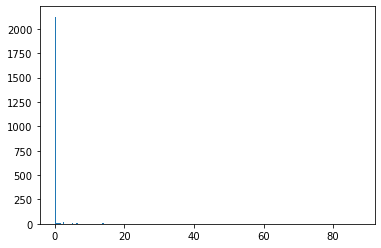

In [63]:
plt.hist(real_stockouts['mean_monthly_usage'], bins=200)

## Get Transactions

In [66]:
txn_converter = {'TXN - Transaction Type': str,
                 'TXN - Transaction Date': str,
                 'TXN - Item ID': str,
                 'TXN - Qty': float,
                 'TXN - Total Cost': float}

In [67]:
txn_df = pd.read_csv('Data/full_transaction_df.csv', converters=txn_converter, index_col=0)
out_txns = txn_df.loc[txn_df['TXN - Transaction Type'] == '030']
out_txns['TXN - Transaction Date'] = pd.to_datetime(out_txns['TXN - Transaction Date'])
out_txns.rename(columns = {'TXN - Unit':'Base'}, inplace=True)
filtered_out_txns = out_txns[['TXN - Item ID', 'Base', 'TXN - Transaction Date', 'TXN - Qty']]

/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_58460/3989541337.py:1: DtypeWarning: Columns (4,7,18,19,20,21,28,34,37,41,45,48,49,51,55,57,58,59,60,67,68,70,71,72,74,76,78,79,80,81) have mixed types. Specify dtype option on import or set low_memory=False.
  txn_df = pd.read_csv('Data/full_transaction_df.csv', converters=txn_converter, index_col=0)
/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_58460/3989541337.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out_txns['TXN - Transaction Date'] = pd.to_datetime(out_txns['TXN - Transaction Date'])
/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_58460/3989541337.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

In [68]:
filtered_out_txns

,TXN - Item ID,Base,TXN - Transaction Date,TXN - Qty
540,04294288,BS012,2009-10-01,1.0
541,04094002,BS012,2009-10-01,1.0
542,04094003,BS012,2009-10-01,1.0
543,04294366,BS012,2009-10-01,5.0
544,04094004,BS012,2009-10-01,12.0
...,...,...,...,...
7265971,02596001,BS024,2020-06-30,2.0
7265972,02591676,BS023,2020-06-30,2.0
7265973,02690379,BS010,2020-06-30,2.0
7265974,04295441,BS018,2020-06-30,2.0


In [69]:
# Filter to last 2 years of usage

today = datetime.date.today()
filtered_out_txns['today'] = today
filtered_out_txns['today'] = pd.to_datetime(filtered_out_txns['today'])
filtered_out_txns['years_ago'] = (filtered_out_txns['today'] - filtered_out_txns['TXN - Transaction Date']).astype('timedelta64[Y]').astype('int')
filtered_out_txns.drop('today', axis=1, inplace=True)

/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_58460/3202858379.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_out_txns['today'] = today
/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_58460/3202858379.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_out_txns['today'] = pd.to_datetime(filtered_out_txns['today'])
/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_58460/3202858379.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [70]:
recent_txns = filtered_out_txns.loc[filtered_out_txns['years_ago'] <= 3]

recent_txns.groupby(['TXN - Item ID', 'years_ago'])['TXN - Qty'].sum().groupby('TXN - Item ID').sum() / 48

TXN - Item ID
00170009         8.229167
00170020         0.062500
00170033         0.208333
00170074         0.020833
00173018         0.458333
                   ...   
R2695001         0.083333
R2695002         0.125000
RA2005261-050    0.020833
RA2005261-054    0.041667
X050032100       0.166667
Name: TXN - Qty, Length: 14615, dtype: float64

In [71]:
recent_txns

,TXN - Item ID,Base,TXN - Transaction Date,TXN - Qty,years_ago
61961,02996032,BS018,2019-10-01,2.0,2
61962,02061006,BS012,2019-10-01,10.0,2
61963,04590447,BS012,2019-10-01,1.0,2
61964,02781019,BS011,2019-10-01,1.0,2
61965,04296076,BS018,2019-10-01,1.0,2
...,...,...,...,...,...
7265971,02596001,BS024,2020-06-30,2.0,1
7265972,02591676,BS023,2020-06-30,2.0,1
7265973,02690379,BS010,2020-06-30,2.0,1
7265974,04295441,BS018,2020-06-30,2.0,1


In [72]:
monthly_demand = recent_txns.groupby(['TXN - Item ID', 'years_ago'])['TXN - Qty'].sum().groupby('TXN - Item ID').sum() / 48
monthly_demand_df = monthly_demand.to_frame().reset_index()
monthly_demand_df.rename(columns={'TXN - Qty': 'mean_monthly_usage'}, inplace=True)

In [73]:
monthly_demand_df

,TXN - Item ID,mean_monthly_usage
0,00170009,8.229167
1,00170020,0.062500
2,00170033,0.208333
3,00170074,0.020833
4,00173018,0.458333
...,...,...
14610,R2695001,0.083333
14611,R2695002,0.125000
14612,RA2005261-050,0.020833
14613,RA2005261-054,0.041667


In [75]:
real_stockouts

,index,Item,Status Current,Trans Date,Qty,Qty Avail,Replen Cls,Reorder Pt,Reord Qty,Max Qty,No Repl,mean_monthly_usage,real_discontinue
0,7,2376006,Active,01/28/2022,0.0,0.0,G,2.0,5.0,5.0,N,0.000000,False
1,10,2220093,Active,01/13/2022,10.0,0.0,G,10.0,10.0,20.0,N,0.000000,False
2,11,2220093,Active,02/11/2022,10.0,0.0,G,10.0,10.0,20.0,N,0.000000,False
3,12,2220093,Active,03/24/2022,0.0,0.0,G,10.0,10.0,20.0,N,0.000000,False
4,13,2220093,Active,01/12/2022,10.0,0.0,G,10.0,10.0,20.0,N,0.000000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2180,3480,31471245,Active,01/19/2022,0.0,0.0,G,15.0,15.0,30.0,N,1.354167,False
2181,3481,31471245,Active,05/04/2022,1.0,0.0,G,15.0,15.0,30.0,N,1.354167,False
2182,3482,31471245,Active,05/06/2022,0.0,0.0,G,15.0,15.0,30.0,N,1.354167,False
2183,3483,31471245,Active,05/09/2022,33.0,0.0,G,15.0,15.0,30.0,N,1.354167,False


In [77]:
real_stockouts.drop('mean_monthly_usage',axis=1, inplace=True)

/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_58460/457979080.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_stockouts.drop('mean_monthly_usage',axis=1, inplace=True)


In [78]:
real_stockouts_with_use = real_stockouts.merge(monthly_demand_df, how='left', left_on='Item', right_on='TXN - Item ID')

In [83]:
real_stockouts_with_use = real_stockouts_with_use.fillna(0)
real_stockouts_with_use

,index,Item,Status Current,Trans Date,Qty,Qty Avail,Replen Cls,Reorder Pt,Reord Qty,Max Qty,No Repl,real_discontinue,TXN - Item ID,mean_monthly_usage
0,7,2376006,Active,01/28/2022,0.0,0.0,G,2.0,5.0,5.0,N,False,0,0.000000
1,10,2220093,Active,01/13/2022,10.0,0.0,G,10.0,10.0,20.0,N,False,0,0.000000
2,11,2220093,Active,02/11/2022,10.0,0.0,G,10.0,10.0,20.0,N,False,0,0.000000
3,12,2220093,Active,03/24/2022,0.0,0.0,G,10.0,10.0,20.0,N,False,0,0.000000
4,13,2220093,Active,01/12/2022,10.0,0.0,G,10.0,10.0,20.0,N,False,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2180,3480,31471245,Active,01/19/2022,0.0,0.0,G,15.0,15.0,30.0,N,False,31471245,1.354167
2181,3481,31471245,Active,05/04/2022,1.0,0.0,G,15.0,15.0,30.0,N,False,31471245,1.354167
2182,3482,31471245,Active,05/06/2022,0.0,0.0,G,15.0,15.0,30.0,N,False,31471245,1.354167
2183,3483,31471245,Active,05/09/2022,33.0,0.0,G,15.0,15.0,30.0,N,False,31471245,1.354167


(0.0, 20.0)

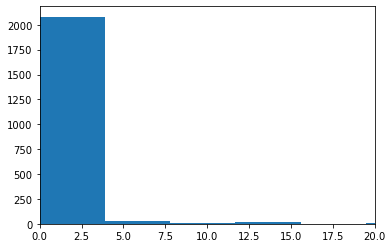

In [88]:
plt.hist(real_stockouts_with_use['mean_monthly_usage'], bins=200)
plt.xlim(0, 20)

In [89]:
len(real_stockouts_with_use.loc[real_stockouts_with_use['mean_monthly_usage'] == 0])

1991

In [91]:
fake_real_stockouts = real_stockouts_with_use.loc[real_stockouts_with_use['mean_monthly_usage'] == 0]
real_real_stockouts = real_stockouts_with_use.loc[real_stockouts_with_use['mean_monthly_usage'] != 0]

In [92]:
fake_real_stockouts

,index,Item,Status Current,Trans Date,Qty,Qty Avail,Replen Cls,Reorder Pt,Reord Qty,Max Qty,No Repl,real_discontinue,TXN - Item ID,mean_monthly_usage
0,7,2376006,Active,01/28/2022,0.0,0.0,G,2.0,5.0,5.0,N,False,0,0.0
1,10,2220093,Active,01/13/2022,10.0,0.0,G,10.0,10.0,20.0,N,False,0,0.0
2,11,2220093,Active,02/11/2022,10.0,0.0,G,10.0,10.0,20.0,N,False,0,0.0
3,12,2220093,Active,03/24/2022,0.0,0.0,G,10.0,10.0,20.0,N,False,0,0.0
4,13,2220093,Active,01/12/2022,10.0,0.0,G,10.0,10.0,20.0,N,False,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2175,3466,2676180,Active,03/10/2022,0.0,0.0,G,0.0,1.0,1.0,N,False,0,0.0
2176,3467,2676180,Active,03/14/2022,2.0,0.0,G,0.0,1.0,1.0,N,False,0,0.0
2177,3468,2676180,Active,04/20/2022,1.0,0.0,G,0.0,1.0,1.0,N,False,0,0.0
2178,3469,2676180,Active,05/05/2022,1.0,0.0,G,0.0,1.0,1.0,N,False,0,0.0


In [96]:
len(fake_real_stockouts['Item'].unique())

355

In [93]:
real_real_stockouts

,index,Item,Status Current,Trans Date,Qty,Qty Avail,Replen Cls,Reorder Pt,Reord Qty,Max Qty,No Repl,real_discontinue,TXN - Item ID,mean_monthly_usage
205,256,30711003,Active,04/22/2022,0.0,0.0,G,1.0,1.0,4.0,N,False,30711003,0.250000
206,257,30711003,Active,05/03/2022,4.0,0.0,G,1.0,1.0,4.0,N,False,30711003,0.250000
340,434,44962002,Active,01/18/2022,6.0,0.0,G,35.0,45.0,80.0,N,False,44962002,12.625000
341,435,44962002,Active,02/01/2022,17.0,0.0,G,35.0,45.0,80.0,N,False,44962002,12.625000
342,436,44962002,Active,03/09/2022,0.0,0.0,G,35.0,45.0,80.0,N,False,44962002,12.625000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2180,3480,31471245,Active,01/19/2022,0.0,0.0,G,15.0,15.0,30.0,N,False,31471245,1.354167
2181,3481,31471245,Active,05/04/2022,1.0,0.0,G,15.0,15.0,30.0,N,False,31471245,1.354167
2182,3482,31471245,Active,05/06/2022,0.0,0.0,G,15.0,15.0,30.0,N,False,31471245,1.354167
2183,3483,31471245,Active,05/09/2022,33.0,0.0,G,15.0,15.0,30.0,N,False,31471245,1.354167


In [106]:
len(real_real_stockouts['Item'].unique())

49

(array([158.,  27.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   6.]),
 array([1.66666667e-01, 7.80604167e+01, 1.55954167e+02, 2.33847917e+02,
        3.11741667e+02, 3.89635417e+02, 4.67529167e+02, 5.45422917e+02,
        6.23316667e+02, 7.01210417e+02, 7.79104167e+02]),
 <BarContainer object of 10 artists>)

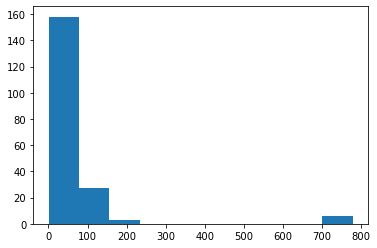

In [94]:
plt.hist(real_real_stockouts['mean_monthly_usage'])

## Get last 2 weeks

In [97]:
stockouts_with_use

,Item,Status Current,Trans Date,Qty,Qty Avail,Replen Cls,Reorder Pt,Reord Qty,Max Qty,No Repl,mean_monthly_usage,real_discontinue
0,2390030,Discontinue,01/05/2022,0.0,0.0,G,0.0,0.0,0.0,Y,0.000000,True
1,2390030,Discontinue,02/02/2022,0.0,0.0,G,0.0,0.0,0.0,Y,0.000000,True
2,2390030,Discontinue,02/23/2022,24.0,0.0,G,0.0,0.0,0.0,Y,0.000000,True
3,2390030,Discontinue,04/08/2022,24.0,0.0,G,0.0,0.0,0.0,Y,0.000000,True
4,2390045,Discontinue,03/07/2022,0.0,0.0,G,0.0,0.0,0.0,Y,0.000000,True
...,...,...,...,...,...,...,...,...,...,...,...,...
3480,31471245,Active,01/19/2022,0.0,0.0,G,15.0,15.0,30.0,N,1.354167,False
3481,31471245,Active,05/04/2022,1.0,0.0,G,15.0,15.0,30.0,N,1.354167,False
3482,31471245,Active,05/06/2022,0.0,0.0,G,15.0,15.0,30.0,N,1.354167,False
3483,31471245,Active,05/09/2022,33.0,0.0,G,15.0,15.0,30.0,N,1.354167,False


In [100]:
stockouts_with_use['Trans Date'] = pd.to_datetime(stockouts_with_use['Trans Date'])

In [103]:
last_two_weeks = stockouts_with_use.loc[stockouts_with_use['Trans Date'] > datetime.datetime(2022, 5, 3)]

In [104]:
last_two_weeks

,Item,Status Current,Trans Date,Qty,Qty Avail,Replen Cls,Reorder Pt,Reord Qty,Max Qty,No Repl,mean_monthly_usage,real_discontinue
20,2051055,Active,2022-05-12,500.0,0.0,G,158.0,395.0,553.0,N,0.000000,False
21,2051055,Active,2022-05-10,200.0,0.0,G,158.0,395.0,553.0,N,0.000000,False
22,2051055,Active,2022-05-12,200.0,0.0,G,158.0,395.0,553.0,N,0.000000,False
53,2424772,Active,2022-05-16,10.0,0.0,G,1000.0,1000.0,1500.0,N,0.000000,False
54,2424772,Active,2022-05-16,10.0,0.0,G,1000.0,1000.0,1500.0,N,0.000000,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3469,2676180,Active,2022-05-05,1.0,0.0,G,0.0,1.0,1.0,N,0.000000,False
3476,2676209,Active,2022-05-11,0.0,0.0,G,0.0,0.0,0.0,Y,0.000000,True
3481,31471245,Active,2022-05-04,1.0,0.0,G,15.0,15.0,30.0,N,1.354167,False
3482,31471245,Active,2022-05-06,0.0,0.0,G,15.0,15.0,30.0,N,1.354167,False


In [105]:
len(last_two_weeks.loc[last_two_weeks['mean_monthly_usage'] == 0])

198

In [110]:
last_two_weeks.loc[last_two_weeks['mean_monthly_usage'] > 0]

,Item,Status Current,Trans Date,Qty,Qty Avail,Replen Cls,Reorder Pt,Reord Qty,Max Qty,No Repl,mean_monthly_usage,real_discontinue
569,31471580,Active,2022-05-04,4.0,0.0,G,2.0,2.0,6.0,N,0.458333,False
721,31191504,Active,2022-05-09,84.0,0.0,G,40.0,40.0,80.0,N,5.187500,False
1106,31155658,Active,2022-05-16,30.0,0.0,G,6.0,13.0,19.0,N,1.562500,False
2711,30610043,Active,2022-05-04,0.0,0.0,G,0.0,0.0,0.0,N,10.416667,True
2796,31155885,Active,2022-05-16,239.0,0.0,G,0.0,0.0,1.0,N,13.000000,False
2943,31501022,Active,2022-05-12,2.0,0.0,G,8.0,8.0,16.0,N,2.416667,False
2944,31501022,Active,2022-05-13,2.0,0.0,G,8.0,8.0,16.0,N,2.416667,False
2945,31501022,Active,2022-05-13,8.0,0.0,G,8.0,8.0,16.0,N,2.416667,False
3481,31471245,Active,2022-05-04,1.0,0.0,G,15.0,15.0,30.0,N,1.354167,False
3482,31471245,Active,2022-05-06,0.0,0.0,G,15.0,15.0,30.0,N,1.354167,False


In [111]:
last_two_weeks.loc[last_two_weeks['mean_monthly_usage'] > 0]['Item'].unique()

array(['31471580', '31191504', '31155658', '30610043', '31155885',
       '31501022', '31471245'], dtype=object)

In [107]:
stockouts_with_use

,Item,Status Current,Trans Date,Qty,Qty Avail,Replen Cls,Reorder Pt,Reord Qty,Max Qty,No Repl,mean_monthly_usage,real_discontinue
0,2390030,Discontinue,2022-01-05,0.0,0.0,G,0.0,0.0,0.0,Y,0.000000,True
1,2390030,Discontinue,2022-02-02,0.0,0.0,G,0.0,0.0,0.0,Y,0.000000,True
2,2390030,Discontinue,2022-02-23,24.0,0.0,G,0.0,0.0,0.0,Y,0.000000,True
3,2390030,Discontinue,2022-04-08,24.0,0.0,G,0.0,0.0,0.0,Y,0.000000,True
4,2390045,Discontinue,2022-03-07,0.0,0.0,G,0.0,0.0,0.0,Y,0.000000,True
...,...,...,...,...,...,...,...,...,...,...,...,...
3480,31471245,Active,2022-01-19,0.0,0.0,G,15.0,15.0,30.0,N,1.354167,False
3481,31471245,Active,2022-05-04,1.0,0.0,G,15.0,15.0,30.0,N,1.354167,False
3482,31471245,Active,2022-05-06,0.0,0.0,G,15.0,15.0,30.0,N,1.354167,False
3483,31471245,Active,2022-05-09,33.0,0.0,G,15.0,15.0,30.0,N,1.354167,False


In [108]:
stockouts_with_use.to_csv('Data/year_to_date_stockouts.csv')